# Part I - (prosperLoanData Exploration)
## by (ADEGUN AHMED OLAMILEKAN)

## Introduction
The dataset for this analysis id Loan Dataset from Proper. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This dataset seek to analyse the some basic questions, which include; 

    1)Factors that affect the Borrower's Annual Percentage Rate
    2)The Relationship that exist between diffent variables
    3)What is the Most Prevalant Employment Status of the Borrowers
    4)Which state access the loan most
    5)The effect of term of loan on Borrowers APR and their Employment Status, etc.





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset into a variable
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# check summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
#checking the null values in every column of the Dataset
isnull_value = df.isnull().sum()
isnull_value.head(20)

ListingKey                       0
ListingNumber                    0
ListingCreationDate              0
CreditGrade                  84984
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
EstimatedEffectiveYield      29084
EstimatedLoss                29084
EstimatedReturn              29084
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
dtype: int64

In [5]:
#analysis of dataset using Describe() function
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

### What is the structure of your dataset?

> The dataset consitst of 113937 entries, 0 to 113936
Data columns (total 81 columns).


### What is/are the main feature(s) of interest in your dataset?

The dataset is on loan schedule for borrower's in a country. This dataset intrigue my interest and curiosity into determine how loan interest are determined and the factors to consider in determining or predict the rate of inerest of a loan and which class of employment get the most interest rate and the lowest interest rate. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

This dataset is clean, it is large and consist of the component to help this analysis, however, the fact that the majority of the Variable needed such as "BorrowerApr", "BorrowerRate", "Term", "EmploymentStatus" are required to provide a comprehensive insight to the analysis.

## Univariate Exploration



Which Term of loan is the most common among borrowers?

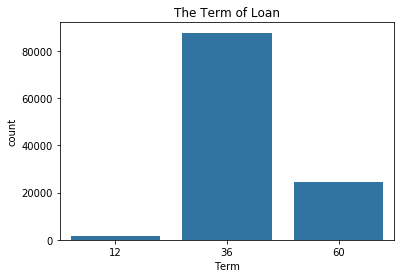

In [6]:
#a function that depict the graphical illustartion of df.term column
def bar_chart_solution_1():
  # data setup
    default_color = sb.color_palette()[0]
    sb.countplot(data = df, x = df.Term, color = default_color)
plt.title("The Term of Loan")
bar_chart_solution_1()

#### The analysis above shows that majority of the loan have 36 month term of loan

What is the Status of the loans?

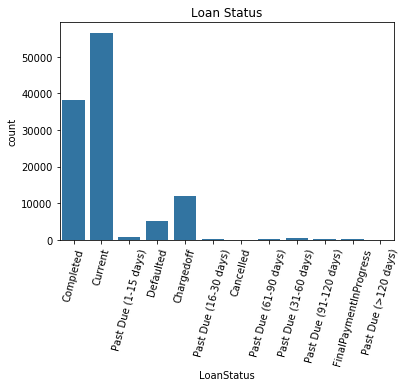

In [7]:
#this depict the graphical illustartion of Loan Status 
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = df.LoanStatus, color = default_color)
plt.xticks(rotation=75) # Rotating the xticks to be more visible and not overlap
plt.title("Loan Status")
plt.show()

#### The above graphical illustration shows that majority of the loan status are still active and are running currently, However, a large number of the borrower have completed there loans

What is the emploment status of borrowers?

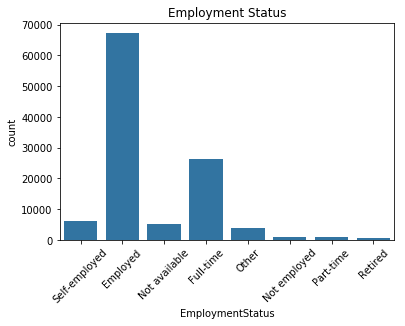

In [8]:
#Graphical illustration of the employment status of borrowers
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color)
plt.xticks(rotation=45) # Rotating the xticks to be more visible and not overlap
plt.title("Employment Status")
plt.show()

#### The above analysis shows that  majority of the borrowers are employed

In [9]:
df['BorrowerAPR'].fillna(method='ffill', inplace=True)

In [10]:
df['BorrowerAPR'].describe()

count    113937.000000
mean          0.218831
std           0.080362
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

How is borrower anuual percentage rate spread acroos the loan?

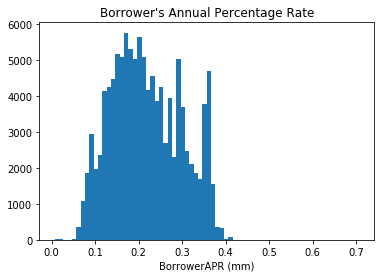

In [11]:
# let's start with the  dimensions of Borrower's Annual Percentage Rate.

variables = ['BorrowerAPR']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df['BorrowerAPR']), max(df['BorrowerAPR'])+0.2, 0.01)
    plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
    plt.xlabel('{} (mm)'.format(var))
plt.title("Borrower's Annual Percentage Rate")    
plt.show()

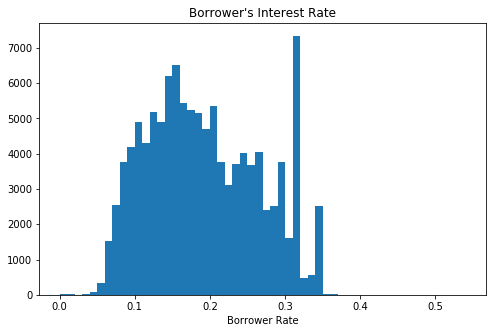

In [12]:
def hist_solution_2():
  # data setup
    
    binsize = 30
    bins = np.arange(0, df['BorrowerRate'].max()+0.05, 0.01)

    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = 'BorrowerRate', bins = bins)
    plt.xlabel('Borrower Rate')
    plt.title("Borrower's Interest Rate")  
hist_solution_2()


#### The graphs above on Borrower's Annual Percentage Rate show that the rate of interest applied to borrowers is grossly below 4% annual but a large chunk of the rate interest is around 2% annual

In [13]:
df['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [14]:
#nan values were displaced using ffill method.
df['DebtToIncomeRatio'].fillna(method='ffill', inplace=True)

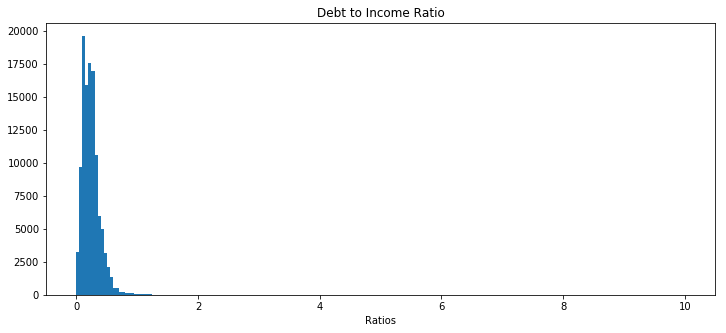

In [15]:
def hist_solution_3():
  # data setup
    
    binsize = 100
    bins = np.arange(0, df['DebtToIncomeRatio'].max()+0.01, 0.05)

    plt.figure(figsize=[12, 5])
    plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
    plt.xlabel('Ratios')
    plt.title('Debt to Income Ratio')

hist_solution_3()

In [16]:
df.StatedMonthlyIncome.head()

0    3083.333333
1    6125.000000
2    2083.333333
3    2875.000000
4    9583.333333
Name: StatedMonthlyIncome, dtype: float64

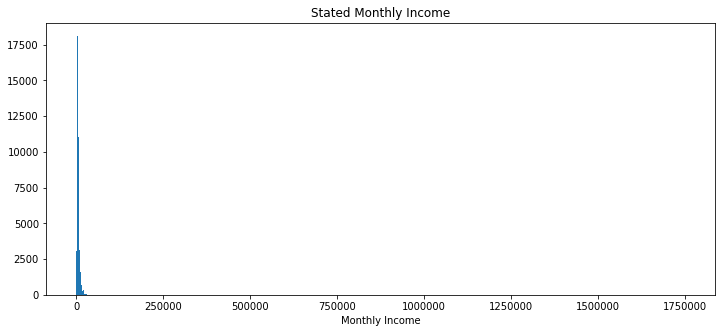

In [17]:
binsize = 20
bins = np.arange(0, df['StatedMonthlyIncome'].max()+1000, 1000)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income')
plt.title('Stated Monthly Income')
plt.show()

In [18]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

How is loan origanl amount spreaded across the loan?

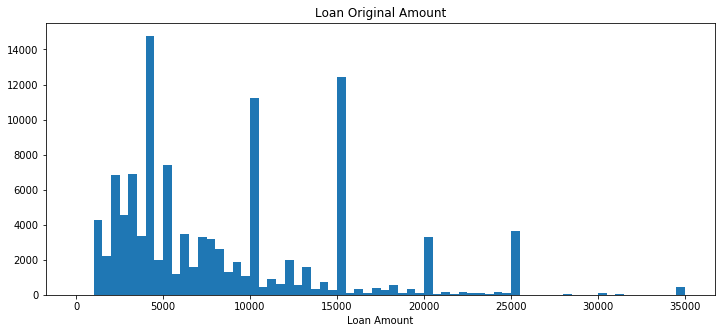

In [19]:
#This Plot will show Loan Original Amount
binsize = 50
bins = np.arange(0, df['LoanOriginalAmount'].max()+500, 500)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.title('Loan Original Amount')
plt.show()

#### Loan Original amount is span across to 35,000 as the maximum loan amount collected. The plot is bimodal 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> This Dataset consist of 81 different variables, but due to some constraint few variables have been selected. The selection is based on the interest of appraising the rate applied on the loan, effect of this rate on the term of period of loan, lender yield. The major variables needed will be appraised to give insight on the analysis. There was no need to perform any transformation, the dataset incorporate all data needed for appraisal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, i did some adjustment to nan values in some numerical variables. The method of treating them is to apply a forward fill method to fill the missing values. Missing Values might not represent well when projecting my findings.

## Bivariate Exploration



What is the relationship between BorrowersAPR and BorrowerRate? 

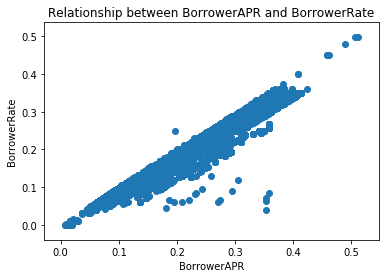

In [20]:

# Scatter plot
plt.scatter(data = df, x = 'BorrowerAPR', y = 'BorrowerRate');
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.title('Relationship between BorrowerAPR and BorrowerRate');

#### There is a strong relationship between Borrower Annual Percentage Rate and Borrower Rate

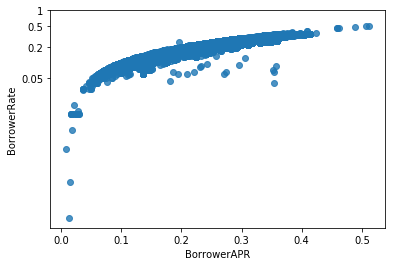

In [21]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['BorrowerAPR'], df['BorrowerRate'].apply(log_trans))
tick_locs = [0.05, 0.2, 0.5, 1]
plt.yticks(log_trans(tick_locs), tick_locs);

#### The implication of the graph above is that the higher the BorrowerAPR goes the Higher the Borrower Rate

What is the relationship among some selected numerical variables?

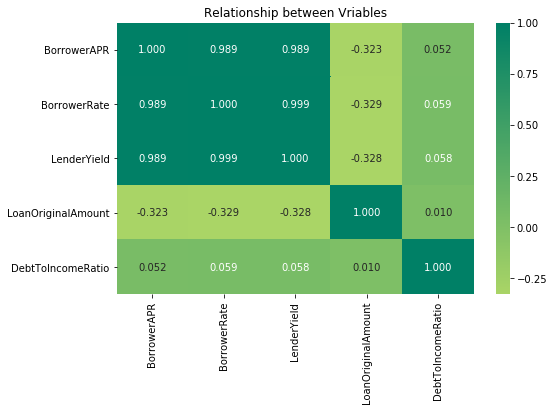

In [22]:
#The relationsip of some Numeric values are tested to show the correlation among temselves
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'LoanOriginalAmount', 'DebtToIncomeRatio'] #Numeric variables are selected

#Scatterplot is plotted
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'summer_r', center = 0)
plt.title('Relationship between Vriables');
plt.show()

#### The analysis above show the relationship that exist among variables. The above depicts that there is a strong relationship between borrowerAPR, BorrowerRate, Lender Yield. however, there is a negative weak correlation for Loan Original Amount and Borrowers rate and APR

Show the distribution of income range, Employement Status and loan status to get their most prevalent count in the dataset

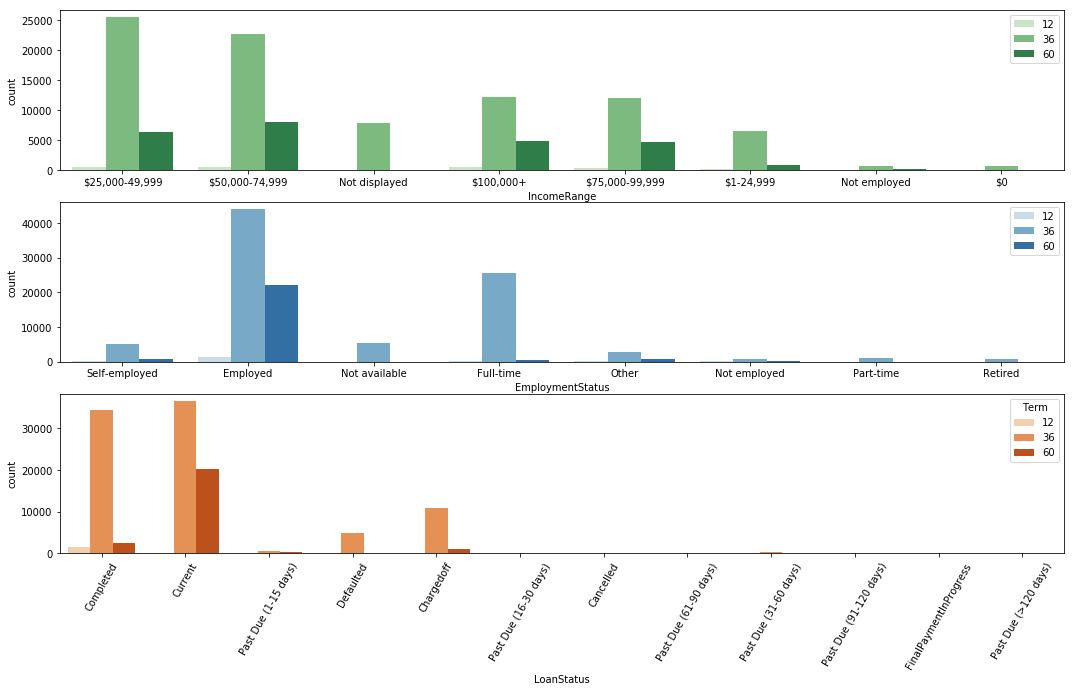

In [34]:
# since there's only three subplots to create, using the full data should be fine.

plt.figure(figsize = [18, 10])

# subplot 3: LoanStatus vs Term
plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette = 'Oranges')
plt.xticks(rotation=60)

# subplot 2: EmploymentStatus vs. Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
ax.legend() 

# subplot 1: IncomeRange vs. Term, use different color palette
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'Greens')
ax.legend() 

plt.show()

#### It is evident from the graphs above that the collection of loan is more popular as the income range reduces. Also, the plot shows that borrowers employed and working as full time subcribed to for more loans. The loan schedule is quite functinal and efficient as more loan are still active and functional. It is very obvious that 36momths term of loan is the most prevalent among borrowers.

Show an Illustation to depict how borrowerAPR with regards to employment status


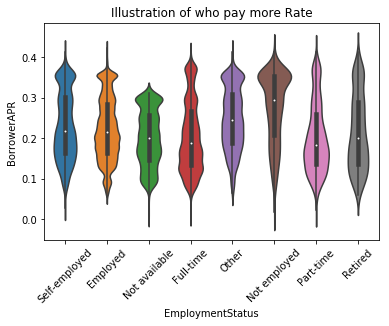

In [24]:

#Violin plot to relate borrowerAPR to Employment Status
sb.violinplot(x='EmploymentStatus', y='BorrowerAPR', data=df, size=3)
plt.title('Illustration of who pay more Rate');
plt.xticks(rotation=45);

#### The above show that not employed pay more annual rate compared to part timers whose majority pay less annual rate

Which term of loan pay less rate?

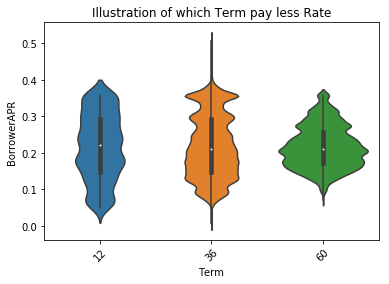

In [25]:
#Violin plot to relate borrowerAPR to Term of Loan

sb.violinplot(x='Term', y='BorrowerAPR', data=df, size=3)
plt.title('Illustration of which Term pay less Rate');

plt.xticks(rotation=45);

#### The above show that the longer your loan term, the less rate you pay annually.

Show the the distribution of loan collection count in the borrower state.

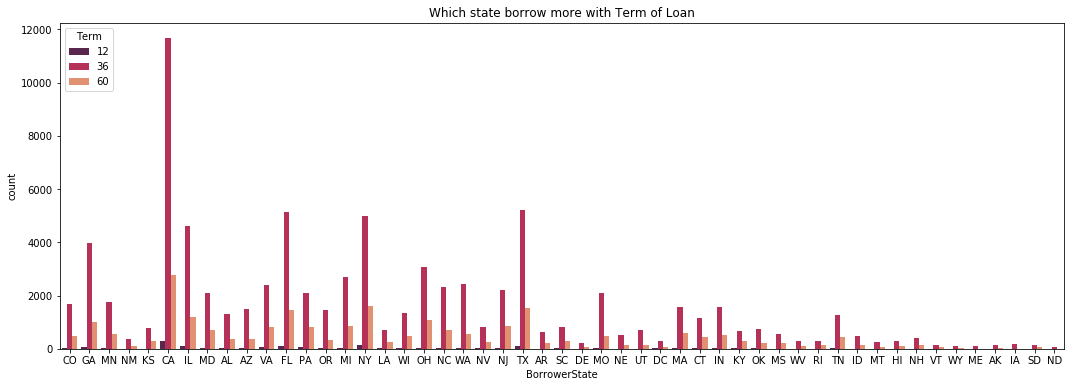

In [26]:
# a countplot to show how borrower state take loan as ir regard to term of loan
plt.figure(figsize = [18, 6])
sb.countplot(data=df, x='BorrowerState', hue='Term', palette='rocket')
plt.title('Which state borrow more with Term of Loan');


#### Califonia is the state that subscribe to most amount of loan. Also, from the analysis, borrower prefer loan of 36months repayment term over 60months, while 12months term is the least popular

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship that exist between variables are different to one another, as the relationship exist to be dependent on each other or to determine the outcome of another variable. For example, it was noticed in the exploration above that unemployed borrowers hardly collect loans. loans is more common among employed borrowers with the least monthly income. The higher earners subcribe to less loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship that exist between other features include, the signification effect of long term loan (60months) on borrower APR, which implies that the majority of the 60 month term of loan pay significantly lesser borrower rate.

## Multivariate Exploration


Which state borrow more with Term of Loan?

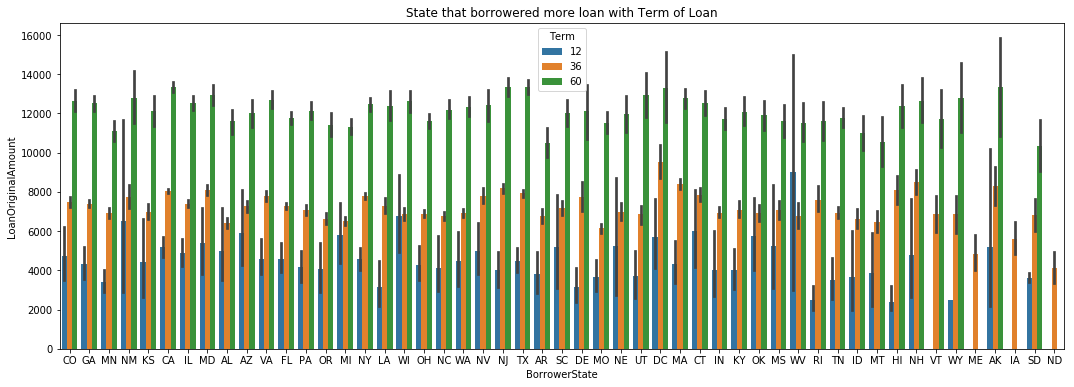

In [27]:
# A barplot to plot three variables ('BorrowerState', 'LoanOriginalAmount','Term') on how they project information
plt.figure(figsize = [18, 6])
sb.barplot('BorrowerState', 'LoanOriginalAmount', hue='Term', data=df)
plt.title('State that borrowered more loan with Term of Loan');


#### Across all the states, it can be seen from above that borrowers with long term loan repayment collect more loan as there is more time to pay, while loan of 12months repayment plan borrow least.

What is the borrower rate based on employment Status?

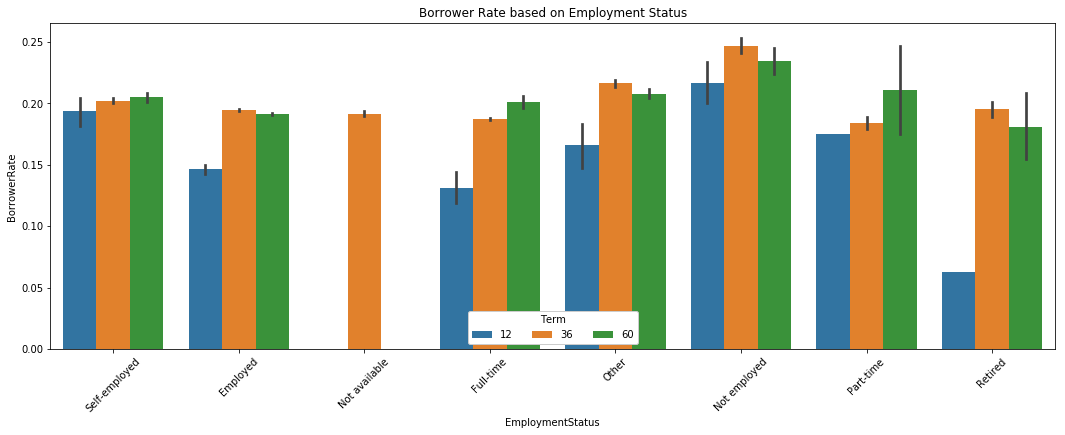

In [28]:
#plotting seaborn bar plot to graphically interprete three variables plotted together
plt.figure(figsize = [18, 6]) # bigger figsize to properly depict the graph
ax = sb.barplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term')
# Rotating the xticks to be more visible and not overlap
plt.xticks(rotation=45)
plt.title('Borrower Rate based on Employment Status');

#### The barplot above show how the borrowing rate accrued to the loan affect the employment status of the borrower. borrower that are not employed tend to pay more rate across all term, However, consideration might have been given to retired borrowers over short term loan payable within 12months as they enjoyed a loq rate of interest on the loan. They pay roughly 6% in rate while others pay more than 11% for 12months term of loan period.


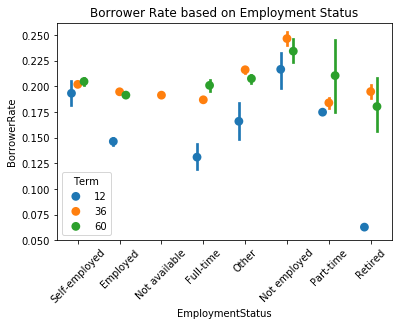

In [29]:
# A pointplot to futher illustrate which employment status pay more loan
ax = sb.pointplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'Term',
                  dodge = 0.3, linestyles = "")
# Rotating the xticks to be more visible and not overlap
plt.xticks(rotation=45)
plt.title('Borrower Rate based on Employment Status');

#### This graph futher illustrate the analysis that borrower that are not employed pay more rate and retired borrowers pay the least in rate for 12months loans.

Using PairGrid, graphically illustrate the relationship between BorrowerRate, BorrowerAPR and LenderYield

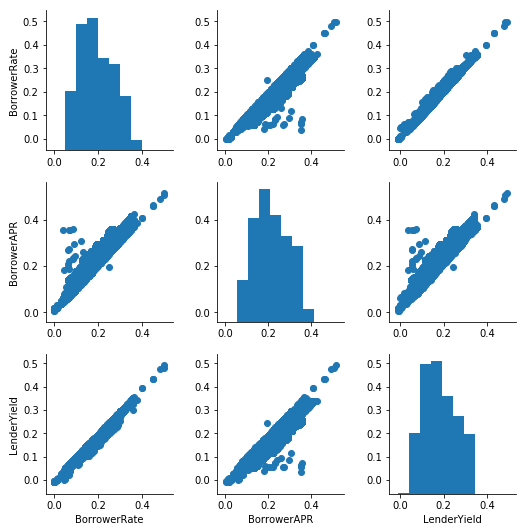

In [30]:
#Pairgrid on three numerical variable
g = sb.PairGrid(data = df, vars = ['BorrowerRate', 'BorrowerAPR', 'LenderYield']) 
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#### The borrower Rate, borrower annual percentage return and the lender yield have strong significant relationship.

Is there any significant relationship that exist between BorrowerRate, BorrowerAPR, LenderYield, MonthlyLoanPayment, StatedMonthlyIncome, and LoanOriginalAmount?

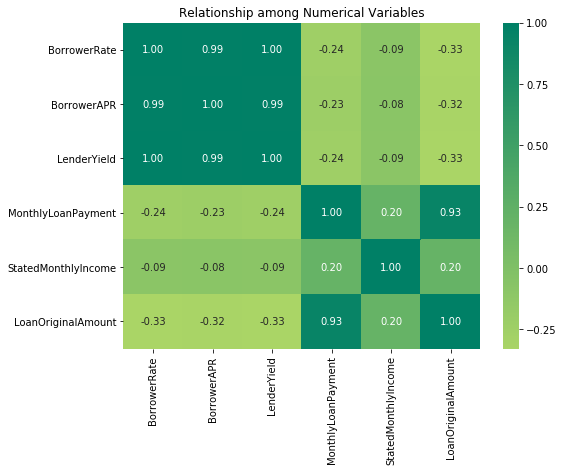

In [31]:
#Six different numerical variables will be appraised to see the relationship in them.
plt.figure(figsize=[8,6]) # setting the the size to the graph to effectively capture the information in it.

level_of_Relation = ['BorrowerRate', 'BorrowerAPR', 'LenderYield','MonthlyLoanPayment', 'StatedMonthlyIncome', 'LoanOriginalAmount'] # 6 different viarables are selected.
sb.heatmap(df[level_of_Relation].corr(), annot = True, fmt = '.2f', cmap = 'summer_r', center = 0) #heatmap to determine how one or more variable is dependent on the other.
plt.title('Relationship among Numerical Variables');

#### The above shows that Monthly loan payment is heavy dependent on the loan original amount, however, stated montly income of borrowers is not significant in determing borrower monthly loan payment, borrower rate, borrower APR and lender yield.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was investigated that 60 month term loan is more popular across all the state, which implies that the borrowers prefer to take large amount of loan for a long period of time in the states. It could also be seen that retired borrowers enjoy the least rate on loans over a short term (12months). It is  also evident that the monthly loan payment is highly dependent on the loan original amount.

### Were there any interesting or surprising interactions between features?

> The intriguing aspect of these anlysis is that it was noticed in the exploration above that unemployed borrowers pay more rate even thou they dont have a job and hardly take loans.

## Conclusions
In the exploration process, the first step taken is to understand the dataset by investigating the shape, form and info about the variables in the dataset. Question is asked to know the direction in which the analysis should follow and features needed to help solve the questions are selected before exploration begins. After exploration of the dataset, the following conclusions are made;

    1) Borrower annual percentage return is higly correlated with lender yield and borrowers rate.
    2) Some vairables are highly dependent on each other, example include, Monthly loan repayment is determined by the amount of loan taken by the borrower.
    3) California is the state take subcribe to the most amount of loan and the most popular term of loan across the state is 60 months term of laon.
    4) The loan schedule is very effective as majority of the loans are still active for periodic payment or have been completed.
    5) Employed citizens access the loan most.
    
